<a href="https://colab.research.google.com/github/suajeong52/hw/blob/main/5%EC%9E%A5%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt 

**1번**

In [2]:
d1_1 = np.sqrt(((1-4)**2) + ((4-2)**2))
print(d1_1)

3.605551275463989


In [3]:
d1_2 = 5

In [4]:
from scipy.spatial import distance

In [5]:
d1_3 = distance.minkowski([1,4], [4,2], 1)
print(d1_3)

5.0


In [6]:
d1_4 = distance.minkowski([1,4], [4,2], 2)
print(d1_4)

3.605551275463989


In [7]:
d1_5 = distance.cosine([1,4], [4,2])
print(d1_5)

0.3492086265440315


**1번 답**
  


1.   3.605551275463989
2.   5
3.   5 - 차수가 1일 땐, 민코브스키 거리와 맨하탄 거리가 같다.
4.   3.605551275463989 - 차수가 2일 땐, 민코브스키 거리와 유클리드 거리가 같다.
5.   0.3492086265440315




**2번_분류**

In [8]:
X_train1 = np.array([[10,8],
                    [20,4],
                    [20,6],
                    [40,4],
                    [50,8]])

Y_train1 = np.array([0,0,0,1,1])

In [9]:
X_test1 = np.array([[30,6]])

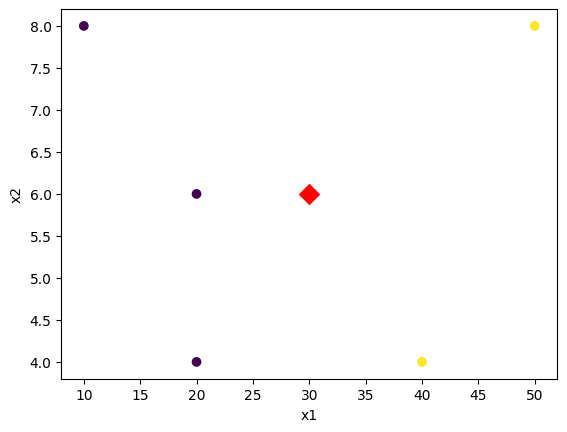

In [10]:
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=Y_train1) 
# 테스트용 데이터
plt.scatter(X_test1[:, 0], X_test1[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [11]:
#피처 스케일링
scalerX1 = StandardScaler()
scalerX1.fit(X_train1)
X_train_std1 = scalerX1.transform(X_train1)
print(X_train_std1)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]


In [12]:
# 피처 스케일링: 테스트용 데이터 
X_test_std1 = scalerX1.transform(X_test1)
print(X_test_std1)

[[0.13608276 0.        ]]


In [13]:
# 모형화 
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
# 학습
knn.fit(X_train_std1, Y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [14]:
# 예측 
pred1 = knn.predict(X_test_std1)
print(pred1)

[0]


In [15]:
knn.predict_proba(X_test_std1)

array([[0.66666667, 0.33333333]])

In [16]:
dist1, index1 = knn.kneighbors(X_test_std1)
print(dist1)
print(index1) 

[[0.68041382 1.30880211 1.30880211]]
[[2 1 3]]


**2번_회귀분석**

In [17]:
X_train2 = np.array([[10,8],
                    [20,4],
                    [20,6],
                    [40,4],
                    [50,8]])

Y_train2 = np.array([[100], [60], [50], [40], [100]])

In [18]:
X_test2 = np.array([[30,6]])

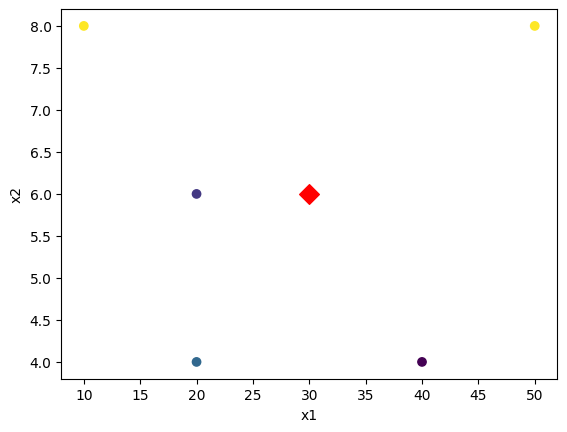

In [19]:
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=Y_train2) 
plt.scatter(X_test2[:, 0], X_test2[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [20]:
# 입력 값
scalerX2 = StandardScaler()
scalerX2.fit(X_train2)
X_train_std2 = scalerX2.transform(X_train2)
print(X_train_std2)

# 목표 값 
scalerY2 = StandardScaler()
scalerY2.fit(Y_train2)
Y_train_std2 = scalerY2.transform(Y_train2)
print(Y_train_std2)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]
[[ 1.18585412]
 [-0.39528471]
 [-0.79056942]
 [-1.18585412]
 [ 1.18585412]]


In [21]:
X_test_std2 = scalerX2.transform(X_test2)
print(X_test_std2)

[[0.13608276 0.        ]]


In [22]:
knn2 = KNeighborsRegressor(n_neighbors = 3, metric='euclidean', weights="uniform")
# 학습
knn2.fit(X_train_std2, Y_train_std2)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [23]:
# 예측 
Y_pred2 = knn2.predict(X_test_std2)
print(Y_pred2)

[[-0.79056942]]


In [24]:
# 예측 값의 역변환
Y_pred_inverse2 = scalerY2.inverse_transform(Y_pred2)
print(Y_pred_inverse2)

[[50.]]


**응용문제**

In [25]:
from sklearn import datasets

In [26]:
data = datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
X_train,X_test,y_train,y_test=train_test_split(data.data, data.target, test_size=0.3, 
                                               random_state=1234)  # 자동으로 랜덤믹스해주는 코드
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [28]:
# 피처 스케일링: 학습 데이터 
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.19191557  0.09824575 -1.32540018 -1.48238937]
 [-0.07560218 -0.57452407  0.73548533  1.52346313]
 [ 1.04071121 -0.12601086  0.79273215  1.39277389]
 [ 2.28105942 -0.12601086  1.30795353  1.39277389]
 [ 1.04071121  0.09824575  1.02171943  1.52346313]
 [-1.19191557 -0.12601086 -1.382647   -1.35170013]
 [ 0.79264157 -0.12601086  0.79273215  1.00070618]
 [ 2.1570246  -0.12601086  1.59418763  1.13139541]
 [ 0.42053711 -0.35026746  0.27751077  0.0858815 ]
 [-1.19191557 -1.47155051 -0.29495742 -0.30618622]
 [-0.32367182 -0.35026746 -0.12321696  0.0858815 ]
 [-0.32367182 -0.12601086  0.39200441  0.34725998]
 [ 1.28878086  0.09824575  0.62099169  0.34725998]
 [ 0.91667639 -0.35026746  0.44925123  0.0858815 ]
 [-0.94384592  0.99527219 -1.382647   -1.22101089]
 [-0.94384592  0.77101558 -1.32540018 -1.35170013]
 [ 1.90895496 -0.57452407  1.30795353  0.87001694]
 [-0.199637   -1.2472939   0.67823851  1.00070618]
 [ 0.79264157  0.32250236  0.73548533  1.00070618]
 [-0.94384592  1.4437854  -1.32

In [29]:
# 피처 스케일링: 테스트 데이터
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[ 0.29650229 -0.12601086  0.44925123  0.21657074]
 [ 0.29650229 -0.35026746  0.50649805  0.21657074]
 [ 0.54457193 -0.35026746  1.02171943  0.7393277 ]
 [-1.56402003  0.77101558 -1.382647   -1.22101089]
 [-0.8198111  -0.79878068  0.04852349  0.21657074]
 [-1.43998521  0.32250236 -1.26815336 -1.35170013]
 [-0.8198111   0.99527219 -1.32540018 -1.35170013]
 [-1.06788075  0.32250236 -1.49714064 -1.35170013]
 [-0.199637   -0.57452407  0.16301713  0.0858815 ]
 [ 2.28105942 -0.57452407  1.65143445  1.00070618]
 [-0.07560218 -0.79878068  0.04852349 -0.04480774]
 [-1.81208967  0.32250236 -1.43989382 -1.35170013]
 [ 2.28105942  1.66804201  1.65143445  1.26208465]
 [ 0.04843264 -0.12601086  0.22026395  0.34725998]
 [-1.06788075  0.99527219 -1.26815336 -0.82894318]
 [-0.199637   -1.02303729 -0.18046378 -0.30618622]
 [ 0.54457193  0.54675897  1.25070671  1.65415237]
 [-1.06788075 -0.12601086 -1.26815336 -1.35170013]
 [ 1.04071121 -1.2472939   1.13621307  0.7393277 ]
 [-0.32367182 -0.79878068  0.22

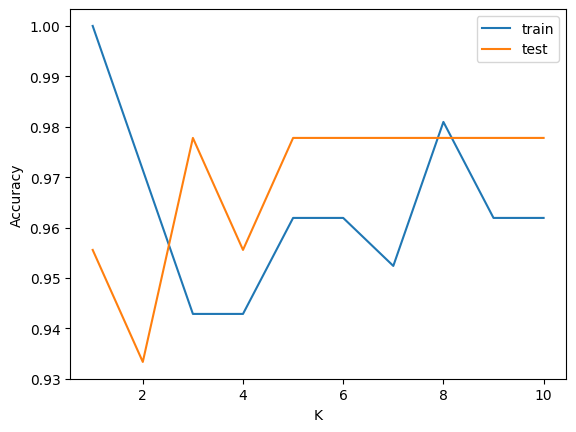

In [30]:
# 학습용 데이터의 분류 정확도
train_accuracy = []
# 테스트 데이터의 분류 정확도
test_accuracy = []

neighbors = range(1, 11)
for k in neighbors:
    # 모형화
    knn = KNeighborsClassifier(n_neighbors=k)
    # 학습 
    knn.fit(X_train_std, y_train)
    # 학습 데이터의 분류 정확도
    score1 = knn.score(X_train_std, y_train)
    train_accuracy.append(score1)
    # 테스트 데이터의 분류 정확도
    score2 = knn.score(X_test_std, y_test)
    test_accuracy.append(score2)

# K의 크기에 따른 분류 정확도 변화
plt.plot(neighbors, train_accuracy, label="train")
plt.plot(neighbors, test_accuracy,  label="test")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
#정확도
test_accuracy

[0.9555555555555556,
 0.9333333333333333,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [32]:
# 모형화 
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
# 학습 
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = knn.predict(X_test_std)
print(y_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 1 1 0 0
 0 0 1 0 1 0 2 2]


In [34]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


In [35]:
#테스트에대한 정확도
knn.score(X_test_std, y_test)

0.9777777777777777

KNN으로 테스트 데이터 분류 후 정확도는 약 0.9777777777777777퍼센트 정도의 정확도를 갖는다.